In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [25]:
crop_data = pd.read_csv('/content/Crop Production data.csv')

In [26]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [27]:
crop_data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


DATA PREPROCESSING AND DATA CLEANING

In [28]:
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [22]:
crop_data.dropna(inplace = True)

In [29]:
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [30]:
crop_data.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [31]:
crop_data['Season'].value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

In [32]:
#Since there are only three types of crops out of which only two are mainly seasonal Rabi and Kharif and one is whole year
#but 5 crop season were present in our dataset , and we got to know that summer and autumn are the synonym of Kharif and
#winter is synonym of Rbi so we decided to replace with their original name which is kharif and rabi
crop_data['Season']=crop_data['Season'].apply(lambda x:x.replace('Autumn','Kharif'))
crop_data['Season']=crop_data['Season'].apply(lambda x:x.replace('Summer','Kharif'))
crop_data['Season']=crop_data['Season'].apply(lambda x:x.replace('Winter','Kharif'))



In [33]:
crop_data['Season'].value_counts()

Season
Kharif         121799
Rabi            66987
Whole Year      57305
Name: count, dtype: int64

In [34]:
#drop rows whose production values are zero
crop_data.drop(crop_data[crop_data['Production']==0].index,inplace=True)

In [35]:
print(f"After removing rows hich has zero Production : {crop_data.shape[0]}")

After removing rows hich has zero Production : 242568


In [36]:
crop_data.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Beans & Mutter(Vegetable)', 'Bhindi',
       'Brinjal', 'Citrus Fruit', 'Grapes', 'Mango', 'Orange',
       'Other Fresh Fruits', 'Papaya', 'Pome Fruit', 'Tomato', 'Soyabean',
       'Rapeseed &Mustard', 'Mesta', 'Cowpea(Lobia)', 'Lemon',
       'Pome Granet', 'Sapota', 'Cabbage', 'Niger seed', 'Sannhamp',
       'Varagu', 'Garlic', 'Ginger', 'Oilseeds total', 'Pulses total',
       'Jute', 'Peas & beans (P

In [38]:
#Replacing kapas to cotton
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)')).replace('Cotton(lint)','Cotton')
crop_data.replace('Jute & mesta','jute',inplace=True)
crop_data.replace('Mesta','Jute',inplace=True)

In [39]:
#Replacing sub-category of pulses with pulse
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
.replace('Other Rabi pulses','pulses')
.replace('Peas & beans (pulses)','pulses')
.replace('Pulses total','pulses')
.replace('other misc.pulses','pulses')
.replace('Moong(Green Gram)','pulses')
.replace('Urad','pulses')
.replace('Arhar/Tur','pulses')
.replace('Bean','pulses')
.replace('Ricebean','pulses')
.replace('Lentil','pulses')
.replace('Masoor','pulses')
.replace('Khesari','pulses')
.replace('Horse_gram','pulses')
.replace('Rajmash Kholar','pulses'))

In [40]:
#Spelling mistakes error
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
.replace('Atcanut(Raw)','Arecanut')
.replace('Arcanut (Processed)','Arecanut')
.replace('Arecanut','Arecanut'))

In [42]:
#replacing variety of spices with spices
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Black Pepper','Other Spices')
                                          .replace('Cardamom','Other Spices')
                                          .replace('Perilla','Other Spices'))

In [43]:
#Merging all the fruits
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Papaya','Fruits')
                                          .replace('Mango','Fruits')
                                          .replace('Orange','Fruits')
                                          .replace('Other Fresh Fruits','Fruits')
                                          .replace('Pineapple','Fruits')
                                          .replace('Citrus Fruit','Fruits')
                                          .replace('Pome Fruit','Fruits')
                                          .replace('Pome Granet','Fruits')
                                          .replace('Grapes','Fruits')
                                          .replace('Jack Fruit','Fruits')
                                          .replace('Sapota','Fruits')
                                          .replace('Lemon','Fruits'))

In [44]:
#replacing the sub-category with the main-category
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Ginger','Dry ginger'))
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Turnip','Onion'))
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Cashewnut Raw','Cashewnut')
                                          .replace('Cashewnut Processed','Cashewnut'))

In [45]:
#Replacing gram with their main category
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Black gram','gram')
                                          .replace('Moth','gram')
                                          .replace('Blackgram','gram'))

In [46]:
#Replacing oilseeds total to other oilseeds                                          .replace('Ginger','Dry ginger'))
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Oilseeds total','other oilseeds')
                                          .replace('Niger seed','other oilseeds'))

In [47]:
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Other Cerealas & Millets','Bajra')
                                          .replace('Samai','Bajra')
                                          .replace('Small millets','Bajra')
                                          .replace('Ragi','Bajra')
                                          .replace('Varagu','Bajra')
                                          .replace('Jobster','Bajra'))

In [49]:
#Replacing sub-category og vegetables with their main category
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x
                                          .replace('Coriander','Other Vegetables')
                                          .replace('Pulses & Mutter(Vegetable)','Other Vegetables')
                                          .replace('Bhindi','Other Vegetables')
                                          .replace('Tomato','Other Vegetables')
                                          .replace('Cowpea(Lobia)','Other Vegetables')
                                          .replace('Cabbage','Other Vegetables')
                                          .replace('Carrot','Other Vegetables')
                                          .replace('Drum Stick','Other Vegetables')
                                          .replace('Redish','Other Vegetables')
                                          .replace('Cauliflower','Other Vegetables')
                                          .replace('Colocosia','Other Vegetables')
                                          .replace('Brinjal','Other Vegetables')
                                          .replace('Bottle Gourd','Other Vegetables')
                                          .replace('Bitter Gourd','Other Vegetables'))

In [50]:
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x.replace('Korra','Total Foodgrain'))
crop_data['Crop']=crop_data['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [52]:
#We are neglecting Less numbers are crops
crop_data.drop(crop_data[crop_data['Crop']=='Tea'].index,inplace=True)
crop_data.drop(crop_data[crop_data['Crop']=='Coffee'].index,inplace=True)
crop_data.drop(crop_data[crop_data['Crop']=='Rubber'].index,inplace=True)
crop_data.drop(crop_data[crop_data['Crop']=='Cond-spcs other'].index,inplace=True)

In [53]:
crop_data.to_csv('Crop_clean.csv')

In [54]:
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Kharif,Rice,279151.0,597899.0


In [55]:
crop_data['Production_area_factor']=crop_data['Production']/crop_data['Area']

In [56]:
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production_area_factor
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Kharif,Rice,279151.0,597899.0,2.141848


In [57]:
Q1 = crop_data['Area'].quantile(0.25)
Q3 = crop_data['Area'].quantile(0.75)
Q1,Q3

(85.0, 4541.0)

In [58]:
IQR = Q3-Q1

In [59]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-6599.0, 11225.0)

In [60]:
area_outlier = crop_data[(crop_data['Area']<lower_limit)| (crop_data['Area']>upper_limit)]

In [62]:
area_outlier['Crop'].value_counts()

Crop
Rice                       9235
Wheat                      5113
pulses                     4281
Maize                      2583
Bajra                      2332
Gram                       1992
Jowar                      1931
Rapeseed &Mustard          1492
Cotton                     1492
Groundnut                  1477
Sugarcane                  1351
Soyabean                   1077
Sesamum                     599
Coconut                     578
Sunflower                   509
Potato                      413
Jute                        304
Guar seed                   265
Castor seed                 249
other oilseeds              242
Horse-gram                  208
Other  Rabi pulses          180
Dry chillies                179
Barley                      171
Arecanut                    169
Cashewnut                   166
Tobacco                     152
Total foodgrain             148
Safflower                   147
Peas & beans (Pulses)       127
Other Vegetables            111
Lin

In [69]:
#Dividing states to Zones
west_India = ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India = ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand']
North_India = ['Jammu and Kashmir','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']
South_india = ['Andhra Pradesh','Karnataka','Kerela','Tamil Nadu','Telangana','Poducherry']

In [70]:
zone = []
for df in crop_data['State_Name']:
    if df in west_India:
         zone.append('West India')
    elif df in East_India:
         zone.append('East India')
    elif df in North_India:
         zone.append('North India')
    elif df in South_india:
         zone.append('South India')
    else:
         zone.append('Union Territory')

In [71]:
crop_data['zone'] = zone

In [73]:
crop_data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Production_area_factor,zone
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,2.617647,East India
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,0.738437,East India
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321,East India
246089,West Bengal,PURULIA,2014,Kharif,Rice,279151.0,597899.0,2.141848,East India
246090,West Bengal,PURULIA,2014,Kharif,Sesamum,175.0,88.0,0.502857,East India


In [74]:
crop_data['zone'].value_counts()

zone
North India        93882
East India         71573
South India        43305
West India         21433
Union Territory    12260
Name: count, dtype: int64

In [75]:
crop_data['Crop_Year'].value_counts()

Crop_Year
2003    15689
2002    15195
2008    14550
2007    14518
2006    14328
2009    14116
2004    14093
2011    14071
2010    14065
2005    13799
2013    13649
2000    13498
2012    13409
2001    13175
1999    12332
1998    11533
2014    10972
1997     8899
2015      562
Name: count, dtype: int64

In [78]:
crop_data.drop(crop_data[crop_data['Crop_Year']==2015].index,inplace=True)

In [80]:
val=crop_data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

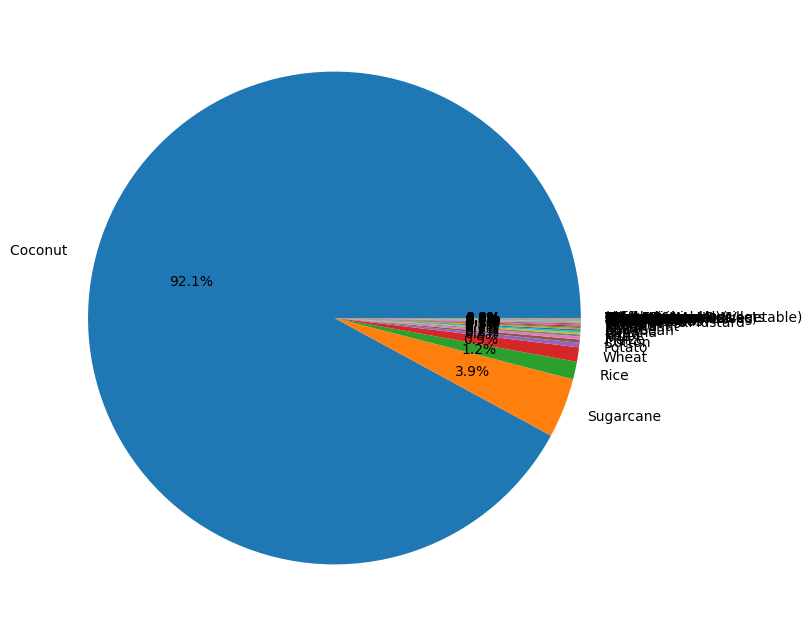

In [81]:
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [82]:
coconut_data = crop_data[crop_data['Crop']=='Coconut']
coconut_data.to_csv('coconut_df.csv')
crop_data.drop(crop_data[crop_data['Crop']=='Coconut'].index,inplace=True)

In [83]:
val=crop_data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

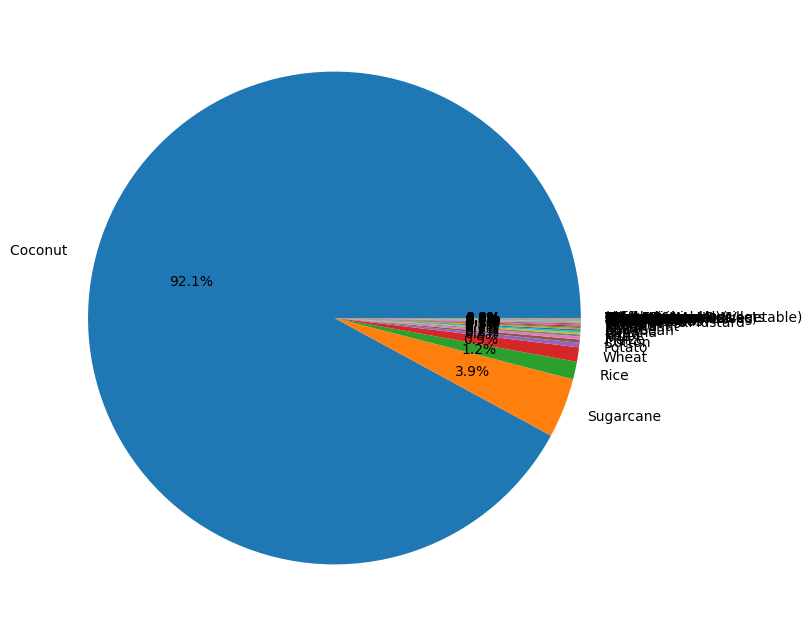

In [84]:
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

**CONCLUSION**
Top 3 Crops as per production in India are:
*Sugarcane
*Rice
*Wheat
Sugarcane:Uttar Pradesh having highest production and max when it Whole year season
Rice:West Bengal having highest production and max in kharif season
Wheat:Uttar Pradesh having highest production and max in Rabi season
North India has maximum Production among all zones

